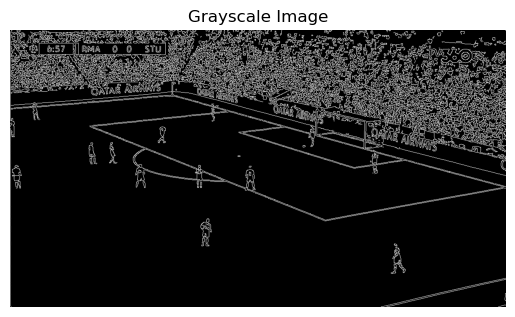

In [2]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = './data/sample/ocr4.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Use Canny edge detection
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

/tmp/ipykernel_1035264/4181987176.py:52: RuntimeWarning: invalid value encountered in arccos
  angle = np.abs(np.arccos(cos_angle) * 180 / np.pi)


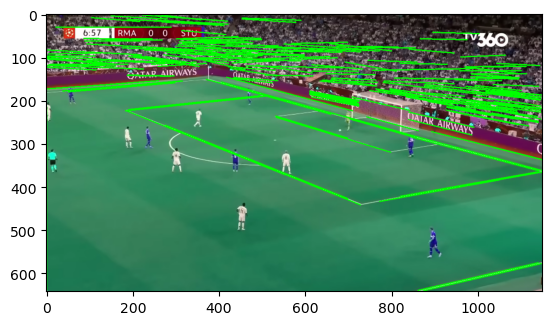

In [4]:
import cv2
import numpy as np

def detect_straight_edges(image_path):
    # Đọc ảnh
    img = cv2.imread(image_path)
    original = img.copy()
    
    # Chuyển sang ảnh xám
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Làm mờ ảnh để giảm noise
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    
    # Phát hiện cạnh bằng Canny
    edges = cv2.Canny(blur, 50, 150)
    
    # Phát hiện đường thẳng bằng Hough Transform
    lines = cv2.HoughLinesP(
        edges,
        rho=1,
        theta=np.pi/180,
        threshold=100,
        minLineLength=100,
        maxLineGap=10
    )
    
    # Vẽ các đường thẳng tìm được
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Tìm các góc vuông (nơi giao nhau của các đường thẳng)
    corners = []
    if lines is not None:
        for i in range(len(lines)):
            for j in range(i+1, len(lines)):
                x1_1, y1_1, x2_1, y2_1 = lines[i][0]
                x1_2, y1_2, x2_2, y2_2 = lines[j][0]
                
                # Tính vector của các đường thẳng
                vector1 = np.array([x2_1 - x1_1, y2_1 - y1_1])
                vector2 = np.array([x2_2 - x1_2, y2_2 - y1_2])
                
                # Tính góc giữa hai vector
                dot_product = np.dot(vector1, vector2)
                norms = np.linalg.norm(vector1) * np.linalg.norm(vector2)
                
                if norms != 0:
                    cos_angle = dot_product / norms
                    angle = np.abs(np.arccos(cos_angle) * 180 / np.pi)
                    
                    # Nếu góc gần 90 độ (góc vuông)
                    if 85 <= angle <= 95:
                        intersection = find_intersection(
                            (x1_1, y1_1), (x2_1, y2_1),
                            (x1_2, y1_2), (x2_2, y2_2)
                        )
                        if intersection:
                            corners.append(intersection)
    
    # Vẽ các góc vuông
    for corner in corners:
        cv2.circle(img, (int(corner[0]), int(corner[1])), 5, (0, 0, 255), -1)
    
    # Hiển thị kết quả
    # cv2.imshow('Original', original)
    # cv2.imshow('Detected Lines', img)
    # cv2.imshow('Edges', edges)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    plt.imshow(original, cmap='gray')
    plt.imshow(img, cmap='gray')
    plt.show()

def find_intersection(p1, p2, p3, p4):
    """Tìm điểm giao nhau của hai đoạn thẳng"""
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    
    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denominator == 0:
        return None
    
    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denominator
    
    if 0 <= t <= 1:
        x = x1 + t * (x2 - x1)
        y = y1 + t * (y2 - y1)
        return (x, y)
    
    return None

# Sử dụng hàm
detect_straight_edges('./data/sample/ocr4.png')

In [27]:
from PIL import Image

# Mở ảnh bằng PIL
image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4.png'
image = Image.open(image_path)

# Kiểm tra kích thước ảnh
width, height = image.size
print(f"Kích thước của ảnh: Chiều rộng = {width}px, Chiều cao = {height}px")


Kích thước của ảnh: Chiều rộng = 1150px, Chiều cao = 642px


In [43]:
image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4.png'

# Mở ảnh
image = Image.open(image_path)

image.size

(1150, 642)

In [51]:
from PIL import Image

# Đường dẫn đến ảnh
image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4.png'

# Mở ảnh
w, h = Image.open(image_path).size

# Xác định vùng crop (bắt đầu từ góc trên bên trái - tọa độ (0, 0))
crop_area = (0, 0, 400, 100)  # (left, upper, right, lower)

# Cắt ảnh
cropped_image = image.crop(crop_area)

# Lưu hoặc hiển thị ảnh đã cắt
cropped_image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4_cropped_v2.png'
cropped_image.save(cropped_image_path)
print(f"Đã lưu ảnh đã cắt tại: {cropped_image_path}")

Đã lưu ảnh đã cắt tại: /home/thiendc/projects/video_summarization/v2/data/sample/ocr4_cropped_v2.png


In [1]:
import os
import easyocr
os.environ['EASYOCR_MODULE_PATH'] = '/home/thiendc/projects/video_summarization/v2/model/easyocr'
reader = easyocr.Reader(['en'], gpu =  True, model_storage_directory = '/home/thiendc/projects/video_summarization/v2/model/easyocr', user_network_directory= '/home/thiendc/projects/video_summarization/v2/model/easyocr', download_enabled= False)

In [2]:
reader.readtext('/home/thiendc/projects/video_summarization/v2/data/sample/ocr4_cropped_v2.png', batch_size = 2, low_text = 0.2)

/home/thiendc/projects/.thienenv/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


[([[82, 30], [134, 30], [134, 60], [82, 60]], '6.57', 0.9994028210639954),
 ([[162, 30], [216, 30], [216, 60], [162, 60]], 'RMA', 0.9999253246893366),
 ([[232, 30], [256, 30], [256, 58], [232, 58]], '0', 0.9999884367323411),
 ([[308, 30], [358, 30], [358, 60], [308, 60]], 'STU', 0.9656268293336236)]

In [18]:
###
image = cv2.imread("/home/thiendc/projects/video_summarization/v2/data/sample/ocr.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)  # Chuyển đổi về dạng uint8

# Phát hiện cạnh theo chiều ngang
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = cv2.convertScaleAbs(sobel_y) 

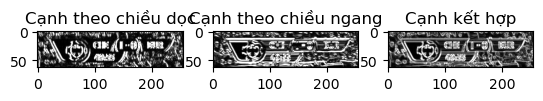

In [19]:
combined_edges = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
# Hiển thị cạnh theo chiều dọc
plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Cạnh theo chiều dọc")

# Hiển thị cạnh theo chiều ngang
plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Cạnh theo chiều ngang")

# Hiển thị cạnh kết hợp
plt.subplot(1, 3, 3)
plt.imshow(combined_edges, cmap='gray')
plt.title("Cạnh kết hợp")

plt.show()


Số lượng cạnh theo chiều dọc trong ảnh: 113


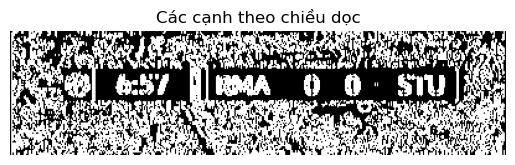

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang thang xám
image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4_cropped.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Sobel để phát hiện các cạnh theo chiều dọc
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)  # Chuyển về dạng uint8

# Áp dụng ngưỡng để tạo ảnh nhị phân (highlight các cạnh dọc)
_, binary = cv2.threshold(sobel_x_abs, 50, 255, cv2.THRESH_BINARY)

# Tìm các contours trong ảnh nhị phân
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Đếm số lượng contours (tương đương số lượng cạnh theo chiều dọc)
vertical_edges_count = len(contours)
print(f"Số lượng cạnh theo chiều dọc trong ảnh: {vertical_edges_count}")

# Hiển thị ảnh các cạnh dọc để kiểm tra trực quan
plt.imshow(binary, cmap='gray')
plt.title("Các cạnh theo chiều dọc")
plt.axis("off")
plt.show()


In [28]:
data = '6:1'

data.split(':')[0]*10

'6666666666'

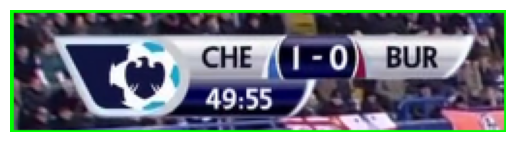

Vị trí của scoreboard: x1=0, y1=0, x2=256, y2=63


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang thang xám
image_path = "/home/thiendc/projects/video_summarization/v2/data/sample/ocr.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (5, 5), 0)
# Áp dụng ngưỡng để chuyển thành ảnh nhị phân
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Áp dụng phép toán hình thái học để làm nổi bật các vùng lớn
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morphed = cv2.dilate(binary, kernel, iterations=3)
morphed = cv2.erode(morphed, kernel, iterations=5)

# Tìm các contours
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Giả định rằng scoreboard là contour lớn nhất hoặc có kích thước phù hợp
scoreboard_contour = max(contours, key=cv2.contourArea)

# Tính bounding box cho scoreboard
x, y, w, h = cv2.boundingRect(scoreboard_contour)
x1, y1 = x, y
x2, y2 = x + w, y + h

# Vẽ bounding box lên ảnh để kiểm tra
image_with_box = image.copy()
cv2.rectangle(image_with_box, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hiển thị ảnh với bounding box
plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# In ra toạ độ của scoreboard
print(f"Vị trí của scoreboard: x1={x1}, y1={y1}, x2={x2}, y2={y2}")


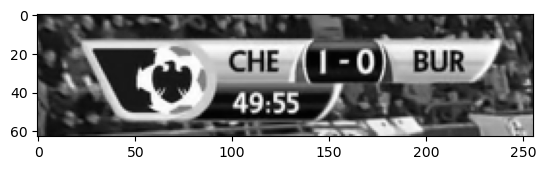

In [24]:
plt.imshow(gray,  cmap='gray')

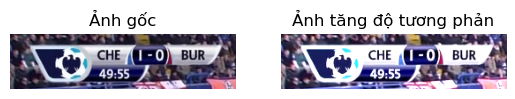

In [25]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
image_path = "/home/thiendc/projects/video_summarization/v2/data/sample/ocr.png"
image = cv2.imread(image_path)

# Điều chỉnh độ tương phản
alpha = 1.5  # Tăng độ tương phản (1.0 giữ nguyên, <1.0 giảm, >1.0 tăng)
beta = 0     # Độ sáng (giá trị dương để tăng, giá trị âm để giảm)

# Áp dụng công thức: new_image = alpha * image + beta
adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Hiển thị ảnh gốc và ảnh đã điều chỉnh
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2RGB))
plt.title("Ảnh tăng độ tương phản")
plt.axis("off")

plt.show()


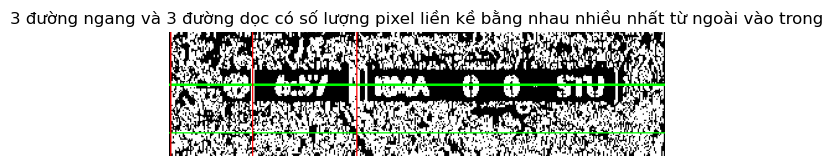

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang thang xám
image_path = '/home/thiendc/projects/video_summarization/v2/data/sample/ocr4_cropped.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sử dụng Sobel để phát hiện các cạnh theo chiều dọc
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)  # Chuyển về dạng uint8

# Áp dụng ngưỡng để tạo ảnh nhị phân (highlight các cạnh dọc)
_, binary = cv2.threshold(sobel_x_abs, 50, 255, cv2.THRESH_BINARY)

# Lấy kích thước ảnh
height, width = binary.shape
row_counts = []
col_counts = []

# Tìm các hàng có số pixel liền kề bằng nhau nhiều nhất
for y in range(height):
    max_count = 0
    current_count = 0
    for x in range(1, width):
        if binary[y, x] == binary[y, x - 1] and binary[y, x] == 255:  # Pixel liền kề cùng giá trị và là cạnh
            current_count += 1
        else:
            max_count = max(max_count, current_count)
            current_count = 0
    max_count = max(max_count, current_count)
    if max_count > 0:
        row_counts.append((max_count, y, 'row'))

# Tìm các cột có số pixel liền kề bằng nhau nhiều nhất
for x in range(width):
    max_count = 0
    current_count = 0
    for y in range(1, height):
        if binary[y, x] == binary[y - 1, x] and binary[y, x] == 255:  # Pixel liền kề cùng giá trị và là cạnh
            current_count += 1
        else:
            max_count = max(max_count, current_count)
            current_count = 0
    max_count = max(max_count, current_count)
    if max_count > 0:
        col_counts.append((max_count, x, 'col'))

# Sắp xếp hàng và cột từ ngoài vào trong theo số pixel liền kề từ nhiều nhất đến ít nhất
center_y, center_x = height // 2, width // 2
sorted_rows = sorted(row_counts, key=lambda x: (-x[0], abs(x[1] - center_y)))
sorted_cols = sorted(col_counts, key=lambda x: (-x[0], abs(x[1] - center_x)))

# Lấy 3 hàng và 3 cột từ ngoài vào trong
top_rows = sorted_rows[:3]
top_cols = sorted_cols[:3]

# Tạo ảnh màu để trực quan hóa
visual_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Vẽ các hàng
for _, y, _ in top_rows:
    cv2.line(visual_image, (0, y), (width - 1, y), (0, 255, 0), 1)  # Vẽ đường màu xanh lá

# Vẽ các cột
for _, x, _ in top_cols:
    cv2.line(visual_image, (x, 0), (x, height - 1), (0, 0, 255), 1)  # Vẽ đường màu đỏ

# Hiển thị ảnh kết quả
plt.imshow(cv2.cvtColor(visual_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("3 đường ngang và 3 đường dọc có số lượng pixel liền kề bằng nhau nhiều nhất từ ngoài vào trong")
plt.show()
